In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
games_df = pd.read_csv('./eda/games.csv')
player_play_df = pd.read_csv('./eda/player_play.csv')
players_df = pd.read_csv('./eda/players.csv')
plays_df = pd.read_csv('./eda/plays.csv')



In [4]:

# Display basic information for each DataFrame to understand the structure and content
games_info = games_df.info()
player_play_info = player_play_df.info()
players_info = players_df.info()
plays_info = plays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354727 entries, 0 to 354726
Data columns (total 50 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      354727 non-null  int6

In [22]:
# Display summary statistics for numeric columns across datasets
games_summary = games_df.describe()
player_play_summary = player_play_df.describe()
players_summary = players_df.describe()
plays_summary = plays_df.describe()
print(games_summary)
print(player_play_summary)
print(players_summary)
print(plays_summary)

             gameId  season        week  homeFinalScore  visitorFinalScore
count  1.360000e+02   136.0  136.000000      136.000000         136.000000
mean   2.022099e+09  2022.0    4.845588       22.669118          20.948529
std    5.996614e+03     0.0    2.567254        8.659874           9.731446
min    2.022091e+09  2022.0    1.000000        3.000000           0.000000
25%    2.022093e+09  2022.0    3.000000       17.000000          14.750000
50%    2.022101e+09  2022.0    5.000000       22.500000          20.000000
75%    2.022102e+09  2022.0    7.000000       27.000000          27.000000
max    2.022111e+09  2022.0    9.000000       49.000000          48.000000
             gameId         playId          nflId  hadRushAttempt  \
count  3.547270e+05  354727.000000  354727.000000   354727.000000   
mean   2.022099e+09    2023.833091   47437.201033        0.019136   
std    5.979081e+03    1182.056487    5167.218156        0.137003   
min    2.022091e+09      54.000000   25511.000000

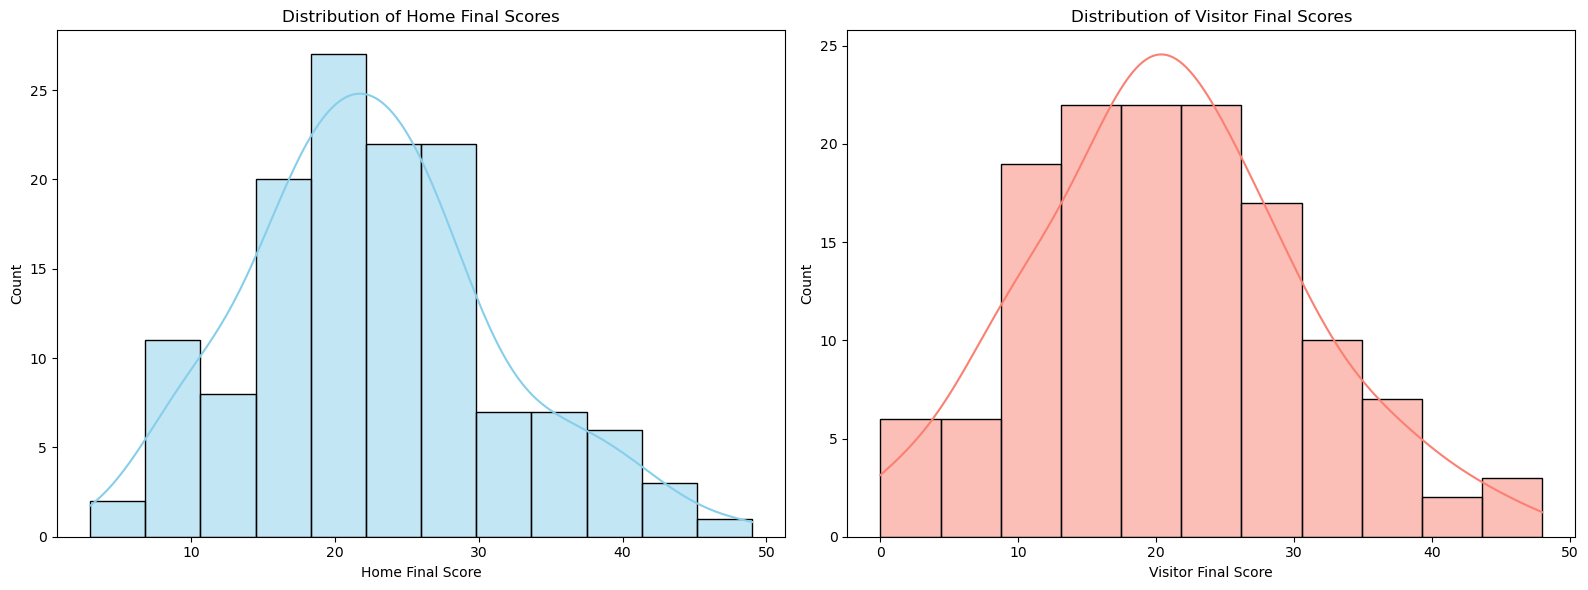

In [9]:
plt.rcParams["figure.figsize"] = (12, 6)

# Visualize the distribution of home and visitor final scores in games
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(games_df['homeFinalScore'], kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribution of Home Final Scores')
ax[0].set_xlabel('Home Final Score')

sns.histplot(games_df['visitorFinalScore'], kde=True, color='salmon', ax=ax[1])
ax[1].set_title('Distribution of Visitor Final Scores')
ax[1].set_xlabel('Visitor Final Score')

plt.tight_layout()
plt.show()

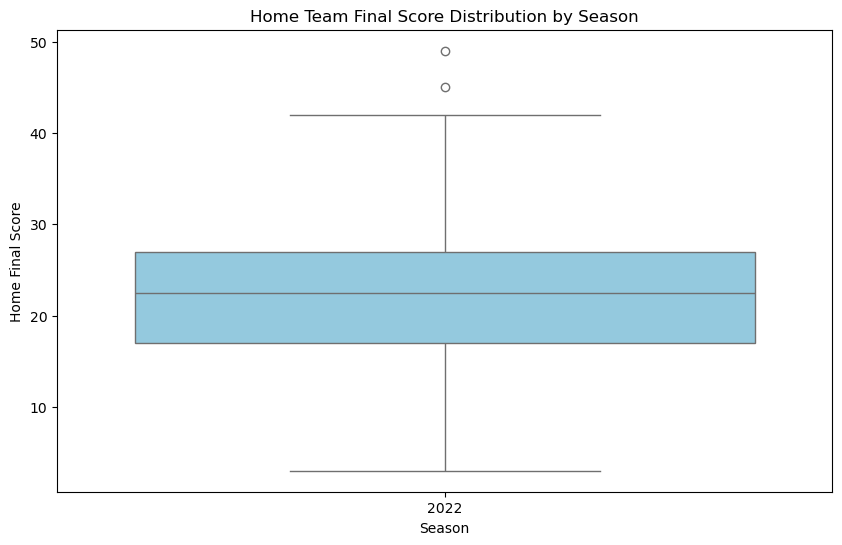

In [10]:
# Further EDA: Creating a range of visualizations for in-depth insights

# 1. Box plots for score distributions by season in games data
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_df, x='season', y='homeFinalScore', color='skyblue')
plt.title('Home Team Final Score Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Home Final Score')
plt.show()

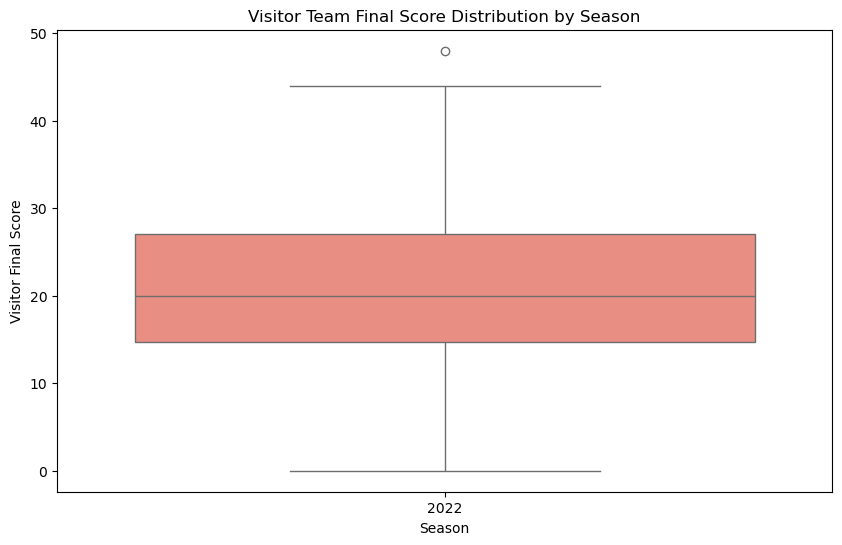

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_df, x='season', y='visitorFinalScore', color='salmon')
plt.title('Visitor Team Final Score Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Visitor Final Score')
plt.show()

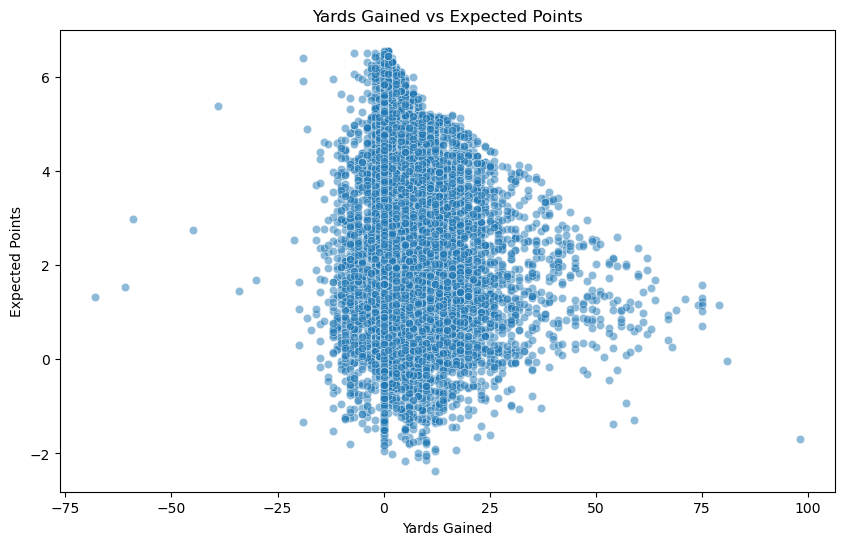

In [12]:
# 2. Scatter plot for yards gained vs expected points in plays data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plays_df, x='yardsGained', y='expectedPoints', alpha=0.5)
plt.title('Yards Gained vs Expected Points')
plt.xlabel('Yards Gained')
plt.ylabel('Expected Points')
plt.show()

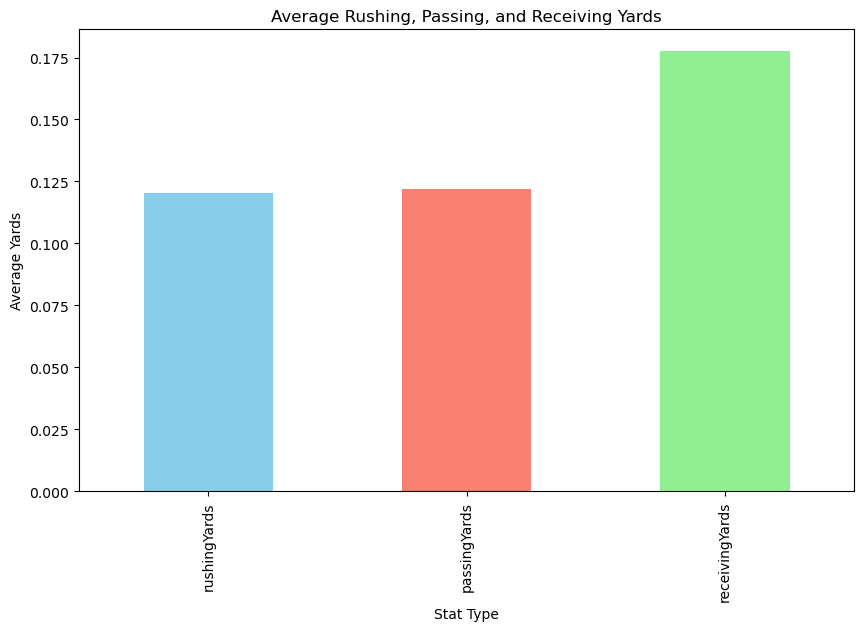

In [13]:
# 3. Bar plot of average rushing, passing, and receiving yards in player play data
player_play_summary_df = player_play_df.groupby('nflId')[['rushingYards', 'passingYards', 'receivingYards']].mean()
player_play_summary_df = player_play_summary_df.mean()

plt.figure(figsize=(10, 6))
player_play_summary_df.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Average Rushing, Passing, and Receiving Yards')
plt.xlabel('Stat Type')
plt.ylabel('Average Yards')
plt.show()

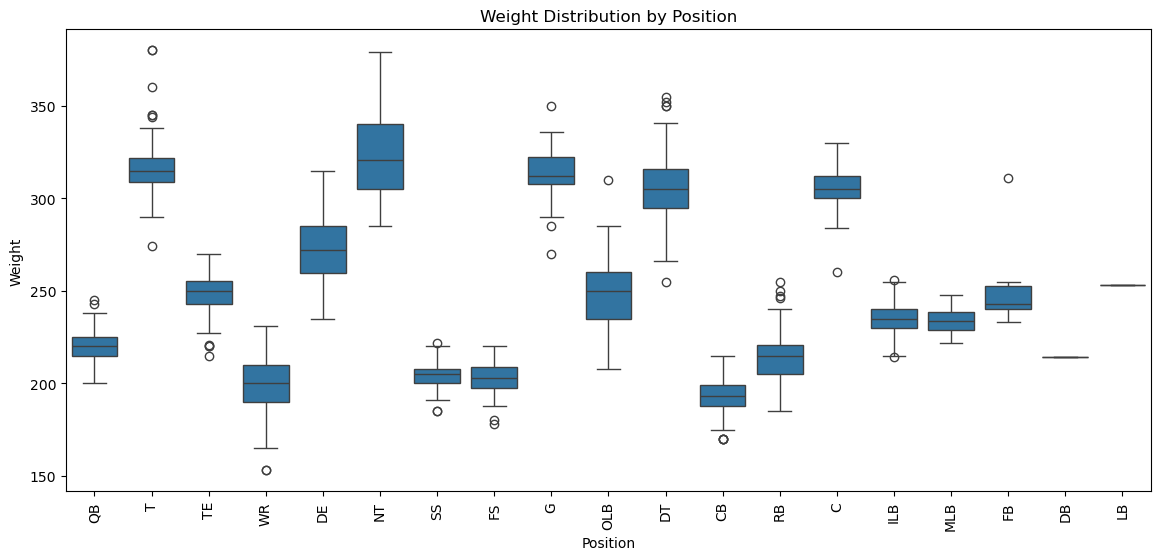

In [14]:
# 4. Distribution plot for the weight of players by position in players data
plt.figure(figsize=(14, 6))
sns.boxplot(data=players_df, x='position', y='weight')
plt.title('Weight Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.show()

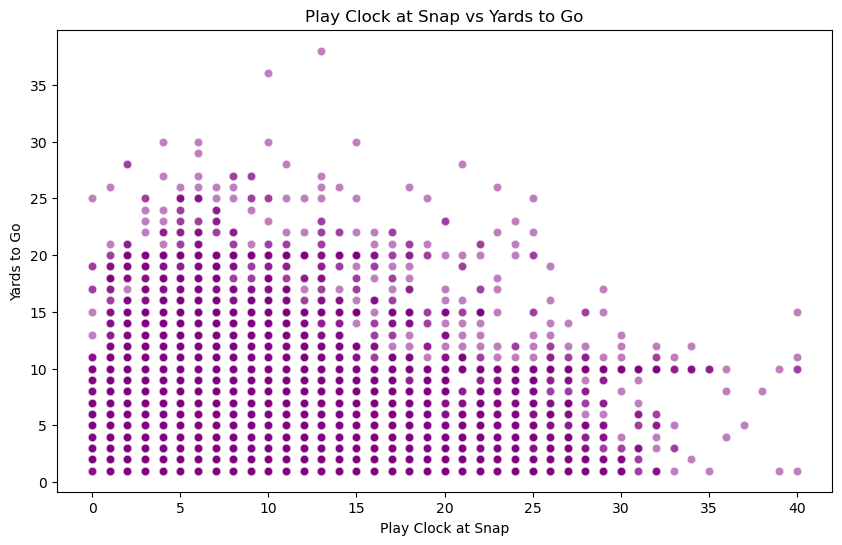

In [16]:
# 5. Scatter plot for play clock at snap vs yards to go
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plays_df, x='playClockAtSnap', y='yardsToGo', alpha=0.5, color='purple')
plt.title('Play Clock at Snap vs Yards to Go')
plt.xlabel('Play Clock at Snap')
plt.ylabel('Yards to Go')
plt.show()

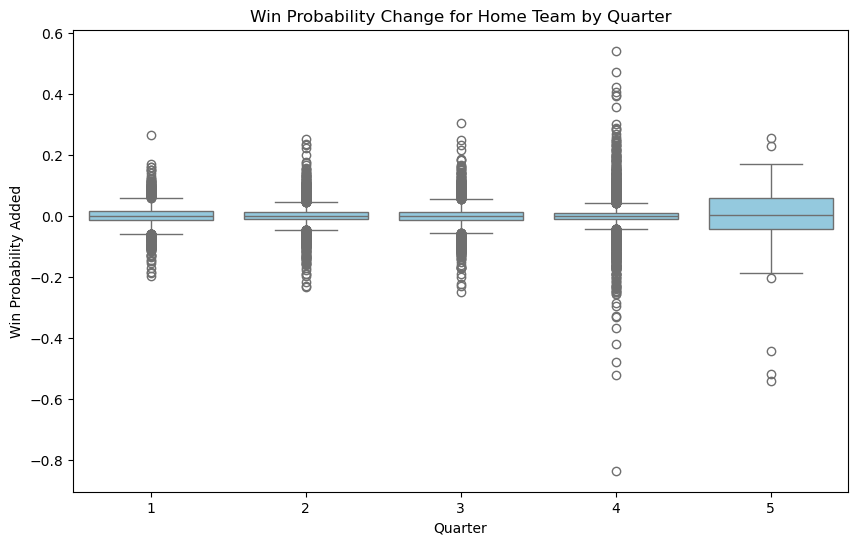

In [17]:
# 6. Box plot for win probability changes by quarter in plays data
plt.figure(figsize=(10, 6))
sns.boxplot(data=plays_df, x='quarter', y='homeTeamWinProbabilityAdded', color='skyblue')
plt.title('Win Probability Change for Home Team by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Win Probability Added')
plt.show()

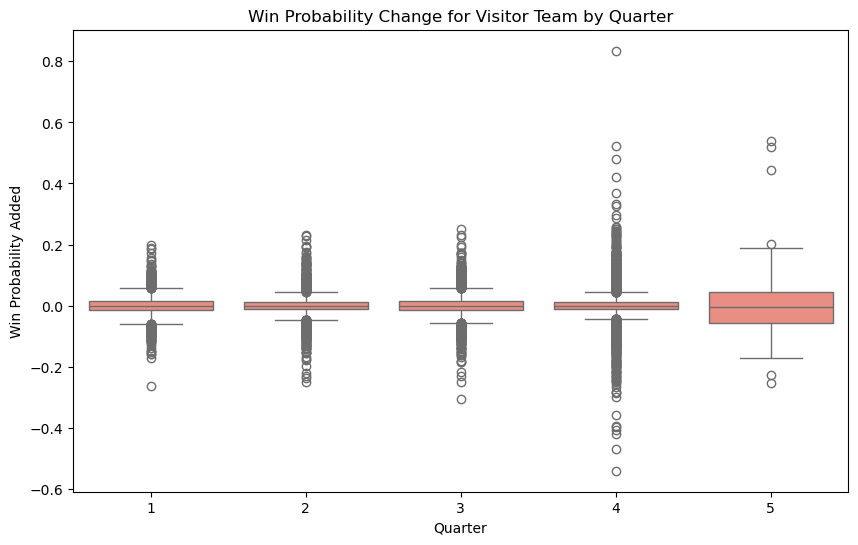

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=plays_df, x='quarter', y='visitorTeamWinProbilityAdded', color='salmon')
plt.title('Win Probability Change for Visitor Team by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Win Probability Added')
plt.show()